## **Trabajo Final - Análisis Exploratorio de Datos**
### Nathaly Henao Lugo

Colombia enfrenta diversos desafíos para maximizar sus exportaciones. Factores como la infraestructura portuaria, la diversidad de productos exportados, el valor de estas exportaciones y la cantidad de empresas involucradas pueden influir significativamente en el volumen total de toneladas exportadas desde los departamentos del país. El objetivo de este análisis es determinar particularmente en qué medida la ausencia de un puerto facilita un mayor volumen de exportaciones aéreas en términos de peso, y cómo las demás variables mencionadas contribuyen a este volumen. Este análisis se basa en datos del año 2023.

Pregunta SMART:
¿En qué medida la presencia de un puerto, el valor en dólares de las exportaciones, el número de empresas y de partidas arancelarias y si es un producto minero energetico o no influye en la cantidad de toneladas aéreas exportadas en Colombia?

**Diccionario de Datos**

| Variable            | Descripción                                                                                         |
|---------------------|-----------------------------------------------------------------------------------------------------|
| **DEPARTAMENTO ORIGEN** | Departamento origen de las exportaciones                                                             |
| **DÓLAR**           | Valor exportado en USD                                                                                |
| **TONELADAS**       | Volumen exportado                                                                                     |
| **TRANSPORTE**      | 1: Aéreo y 0: Marítimo                                                                               |
| **PUERTO**          | Indica si un departamento tiene puerto (0) o no (1)                                                  |
| **PARTIDA ARANCELARIA** | Código del producto exportado                                                                         |
| **NIT**             | Número de identificación de la empresa                                                                |
| **Clas.**           | 1: Si el producto es sin minería, petróleo y sus derivados, y 0: Petróleo, minería y sus derivados    |
| **NUMEROEMPRESAS**  | Número de empresas en cada departamento                                                              |
| **NUMEROSUBPARTIDAS** | Número de subpartidas exportadas por cada departamento                                               |



In [2]:
# Importar las librerías necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Leer el archivo Excel como un DataFrame
df = pd.read_excel('2023.xlsx')

# Ahora puedes usar el método info() en el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147525 entries, 0 to 147524
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CAPÍTULO                         147525 non-null  int64  
 1   PARTIDA ARANCELARIA              147525 non-null  int64  
 2   Grupo                            147525 non-null  object 
 3   4 dígitos                        147525 non-null  int64  
 4   Desc 4                           147525 non-null  object 
 5   DESCRIPCIÓN PARTIDA ARANCELARIA  147509 non-null  object 
 6   NIT                              145264 non-null  float64
 7   RAZÓN SOCIAL EXPORTADOR          147525 non-null  object 
 8   LUGAR DE SALIDA                  147525 non-null  object 
 9   CÓDIGO PAÍS                      147525 non-null  object 
 10  PAÍS DESTINO                     147524 non-null  object 
 11  DEPARTAMENTO ORIGEN              147525 non-null  object 
 12  AD

-*Selección de las **variables objetivo**. Es decir, tomaremos aquellas variables de interés que nos servirán para revisar todo el análisis descriptivo de la información.*

In [4]:
# Seleccionar solo las columnas que necesitas
columnas_seleccionadas = ['DEPARTAMENTO ORIGEN', 'DÓLAR', 'TONELADAS', 'TRANSPORTE', 'PUERTO', 'PARTIDA ARANCELARIA','NIT','Clas.']

# Crear un nuevo DataFrame con solo esas columnas
df_seleccionado = df[columnas_seleccionadas]

# Verificar que solo quedaron las columnas deseadas
df_seleccionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147525 entries, 0 to 147524
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DEPARTAMENTO ORIGEN  147525 non-null  object 
 1   DÓLAR                147525 non-null  float64
 2   TONELADAS            147525 non-null  float64
 3   TRANSPORTE           147525 non-null  object 
 4   PUERTO               147525 non-null  object 
 5   PARTIDA ARANCELARIA  147525 non-null  int64  
 6   NIT                  145264 non-null  float64
 7   Clas.                147525 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.0+ MB


-*Formato a las variables*

In [5]:
# Convertir las columnas a tipo texto (string)
df_seleccionado.loc[:, 'DEPARTAMENTO ORIGEN'] = df_seleccionado['DEPARTAMENTO ORIGEN'].astype(str)
df_seleccionado.loc[:, 'TRANSPORTE'] = df_seleccionado['TRANSPORTE'].astype(str)
df_seleccionado.loc[:, 'PUERTO'] = df_seleccionado['PUERTO'].astype(str)

# Convertir las columnas a tipo entero
df_seleccionado.loc[:, 'DÓLAR'] = df_seleccionado['DÓLAR'].astype('float')
df_seleccionado.loc[:, 'TONELADAS'] = df_seleccionado['TONELADAS'].astype('float')

# Verificar los tipos de datos
df_seleccionado.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147525 entries, 0 to 147524
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DEPARTAMENTO ORIGEN  147525 non-null  object 
 1   DÓLAR                147525 non-null  float64
 2   TONELADAS            147525 non-null  float64
 3   TRANSPORTE           147525 non-null  object 
 4   PUERTO               147525 non-null  object 
 5   PARTIDA ARANCELARIA  147525 non-null  int64  
 6   NIT                  145264 non-null  float64
 7   Clas.                147525 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.0+ MB


C:\Users\nhenao\AppData\Local\Temp\ipykernel_26496\3019420196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado.loc[:, 'DEPARTAMENTO ORIGEN'] = df_seleccionado['DEPARTAMENTO ORIGEN'].astype(str)
C:\Users\nhenao\AppData\Local\Temp\ipykernel_26496\3019420196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado.loc[:, 'TRANSPORTE'] = df_seleccionado['TRANSPORTE'].astype(str)
C:\Users\nhenao\AppData\Local\Temp\ipykernel_26496\3019420196.py:4: SettingWithCopyWarning: 
A value is 

-*Verifico la existencia de nulos*

In [6]:
datos_nulos = df_seleccionado.isnull()
for columna in datos_nulos.columns.values.tolist():
    print (datos_nulos[columna].value_counts())
    print("")

False    147525
Name: DEPARTAMENTO ORIGEN, dtype: int64

False    147525
Name: DÓLAR, dtype: int64

False    147525
Name: TONELADAS, dtype: int64

False    147525
Name: TRANSPORTE, dtype: int64

False    147525
Name: PUERTO, dtype: int64

False    147525
Name: PARTIDA ARANCELARIA, dtype: int64

False    145264
True       2261
Name: NIT, dtype: int64

False    147525
Name: Clas., dtype: int64



Debido a que la información DANE-DIAN fue anonimizada para las PERSONAS NATURALES en el 2023, en NIT existen valores NULL que corresponden a personas naturales. 
-*Se procede a cambiar NULL por 0*

In [7]:
# Reemplazar los valores nulos en la columna 'NIT' por 0
df_seleccionado['NIT'].fillna(0, inplace=True)

# Verificar que ya no haya valores nulos en la columna 'NIT'
print(df_seleccionado['NIT'].isnull().sum())


0


C:\Users\nhenao\AppData\Local\Temp\ipykernel_26496\1539482736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['NIT'].fillna(0, inplace=True)


-*Creación de variables a partir de la columna NUMERO DE PARTIDAS Y NIT*

In [8]:
# Contar las partidas arancelarias únicas por departamento. Partidas es igual a subpartidas 
conteo_partidas_unicas = df_seleccionado.groupby('DEPARTAMENTO ORIGEN')['PARTIDA ARANCELARIA'].nunique().reset_index()

# Renombrar la columna del conteo para mayor claridad
conteo_partidas_unicas.columns = ['DEPARTAMENTO ORIGEN', 'NUMEROSUBPARTIDAS']

# Mostrar el resultado
conteo_partidas_unicas


,DEPARTAMENTO ORIGEN,NUMEROSUBPARTIDAS
0,ANTIOQUIA.,3125
1,ARAUCA.,32
2,ATLANTICO.,1726
3,BOGOTA D.C.,3979
4,BOLIVAR.,1256
5,BOYACA.,107
6,CALDAS.,511
7,CAQUETA.,17
8,CASANARE.,27
9,CAUCA.,214


In [9]:
# Contar empresas únicas con NIT diferente de 0 por cada departamento
conteo_empresas_unicas_por_departamento = df_seleccionado[df_seleccionado['NIT'] != 0].groupby('DEPARTAMENTO ORIGEN')['NIT'].nunique().reset_index()

# Renombrar columnas para mayor claridad
conteo_empresas_unicas_por_departamento.columns = ['DEPARTAMENTO ORIGEN', 'NUMEROEMPRESAS']

# Mostrar el resultado
conteo_empresas_unicas_por_departamento

,DEPARTAMENTO ORIGEN,NUMEROEMPRESAS
0,ANTIOQUIA.,2674
1,ARAUCA.,21
2,ATLANTICO.,683
3,BOGOTA D.C.,4610
4,BOLIVAR.,504
5,BOYACA.,96
6,CALDAS.,212
7,CAQUETA.,13
8,CASANARE.,15
9,CAUCA.,105


-*MERGE para agregar mis columnas nuevas al df*

In [10]:
# Realizar el merge entre df_seleccionado y conteo_partidas_unicas
df_combinado = pd.merge(df_seleccionado, conteo_partidas_unicas, on='DEPARTAMENTO ORIGEN', how='left')
df_combinado2 = pd.merge(df_combinado,conteo_empresas_unicas_por_departamento, on ='DEPARTAMENTO ORIGEN',how='left')

# Mostrar el resultado
df_combinado2.head(3)


,DEPARTAMENTO ORIGEN,DÓLAR,TONELADAS,TRANSPORTE,PUERTO,PARTIDA ARANCELARIA,NIT,Clas.,NUMEROSUBPARTIDAS,NUMEROEMPRESAS
0,NO DILIGENCIADO C),2.918547e+09,5.938404e+06,Marítimo,NO,2709000000,899999068.0,Petróleo y sus derivados y minas,8,2
1,NO DILIGENCIADO C),2.880118e+09,6.159131e+06,Marítimo,NO,2709000000,899999068.0,Petróleo y sus derivados y minas,8,2
2,NO DILIGENCIADO C),1.581015e+09,3.413897e+06,Marítimo,NO,2709000000,899999068.0,Petróleo y sus derivados y minas,8,2


In [11]:
df_combinado2['TRANSPORTE'].value_counts()

Marítimo                      64611
Aéreo                         62136
Terrestre (carretero)         20506
Instalaciones Fijas             268
Vías navegables interiores        3
Correo                            1
Name: TRANSPORTE, dtype: int64

-Transformacíon a la columna TRANSPORTE. Las categorías "Instalaciones Fijas", "Vías navegables interiores", y "Correo" se consideran valores que deben ser reemplazados por "Otros"

In [12]:
class No():
    # Constructor de la clase
    def __init__(self, feature_names):
        self._feature_names = feature_names

    # No se realiza nada en fit, solo se devuelve self
    def fit(self, X, y=None):
        return self

    # Método transform para aplicar la transformación
    def transform(self, X, y=None):
        
        # Función interna para mapear valores
        def map_values(val):
            if val in ["Instalaciones Fijas", "Vías navegables interiores","Correo"]:
                return 'Otros'
            else:
                return val

        # Crear una copia del DataFrame original
        X_ = X.copy()

        # Aplicar la transformación sin imprimir el conteo
        X_[self._feature_names] = X_[self._feature_names].apply(map_values)

        return X_



In [13]:
# Creamos un dataset para probar el tranformer

data1=[(0, "Marítimo"),(0, "Aéreo"), (0, "Terrestre (carretero"), (1, "Instalaciones Fijas"), (1,"Vías navegables interiores") ,(1,"Correo"), (1, "Otros")]

df = pd.DataFrame(data1, columns=["Label", "TRANSPORTE"])

df.head()

,Label,TRANSPORTE
0,0,Marítimo
1,0,Aéreo
2,0,Terrestre (carretero
3,1,Instalaciones Fijas
4,1,Vías navegables interiores


In [14]:
# Librerías básicas

import pandas as pd
import numpy as np

# Visualización

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# missing value imputation

from sklearn.impute import SimpleImputer

# pipeline & transformer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
# APlicamos la trasnformación

pipeline=Pipeline(steps=[("CT", No("TRANSPORTE"))])
result = pipeline.fit_transform(df)
result

,Label,TRANSPORTE
0,0,Marítimo
1,0,Aéreo
2,0,Terrestre (carretero
3,1,Otros
4,1,Otros
5,1,Otros
6,1,Otros


In [16]:
# Aplicamos el pipeline al dataset

pipeline=Pipeline(steps=[("CT", No("TRANSPORTE"))])
result = pipeline.fit_transform(df_combinado2)
result['TRANSPORTE'].value_counts()

# Si quieres modificar df_agrupado directamente, reasigna el DataFrame
df_combinado2 = result


In [17]:
df_combinado2['TRANSPORTE'].value_counts()

Marítimo                 64611
Aéreo                    62136
Terrestre (carretero)    20506
Otros                      272
Name: TRANSPORTE, dtype: int64

### **<span> Análisis Univariado </span>** 

Variables númericas

Las variables "DÓLAR" y "TONELADAS" presentan una alta variabilidad con múltiples valores atípicos, lo que podría estar afectando las estadísticas de resumen como la media y la desviación estándar. Es importante destacar que los valores "0" en "DÓLAR" y "NETOS" no indican una ausencia de exportación, sino que corresponden a valores extremadamente bajos que han sido redondeados. La dispersión en estas variables puede interpretarse en función del objetivo de la exportación. Por ejemplo, existen casos de exportaciones de encomiendas que no tienen un valor ni un peso significativo, así como casos de empresas que exportan grandes volúmenes de carga que no necesariamente se traducen en montos elevados en USD. Un ejemplo de esto es la exportación de oro. La presencia de numerosos casos con estas características provoca que estas variables tengan muchos valores atípicos.

En contraste, las variables "NUMEROSUBPARTIDAS" y "NUMEROEMPRESAS" muestran una distribución más concentrada y menos dispersa, lo que se refleja en sus diagramas de caja más compactos y sin valores atípicos destacados. Aunque el valor mínimo es 1 y el máximo alcanza 3.979 en el caso del número de subpartidas y 4.610 en el caso del número de empresas, estas variables presentan una mayor consistencia en su distribución.

In [18]:
# Seleccionar las 4 variables y aplicar describe
descripcion = df_combinado2[['DÓLAR', 'TONELADAS', 'NUMEROSUBPARTIDAS', 'NUMEROEMPRESAS']].describe()

# Formatear los números para que se muestren con puntos como separador de miles y sin decimales
descripcion2= descripcion.applymap(lambda x: "{:,.0f}".format(x).replace(",", "."))

# Mostrar el resumen estadístico formateado
print(descripcion2)

               DÓLAR  TONELADAS NUMEROSUBPARTIDAS NUMEROEMPRESAS
count        147.525    147.525           147.525        147.525
mean         335.827        697             2.825          2.612
std       13.050.375     35.647             1.110          1.609
min                0          0                 1              1
25%              479          0             2.156          1.237
50%            3.701          0             3.125          2.674
75%           25.688          3             3.979          4.610
max    2.918.547.300  6.159.131             3.979          4.610


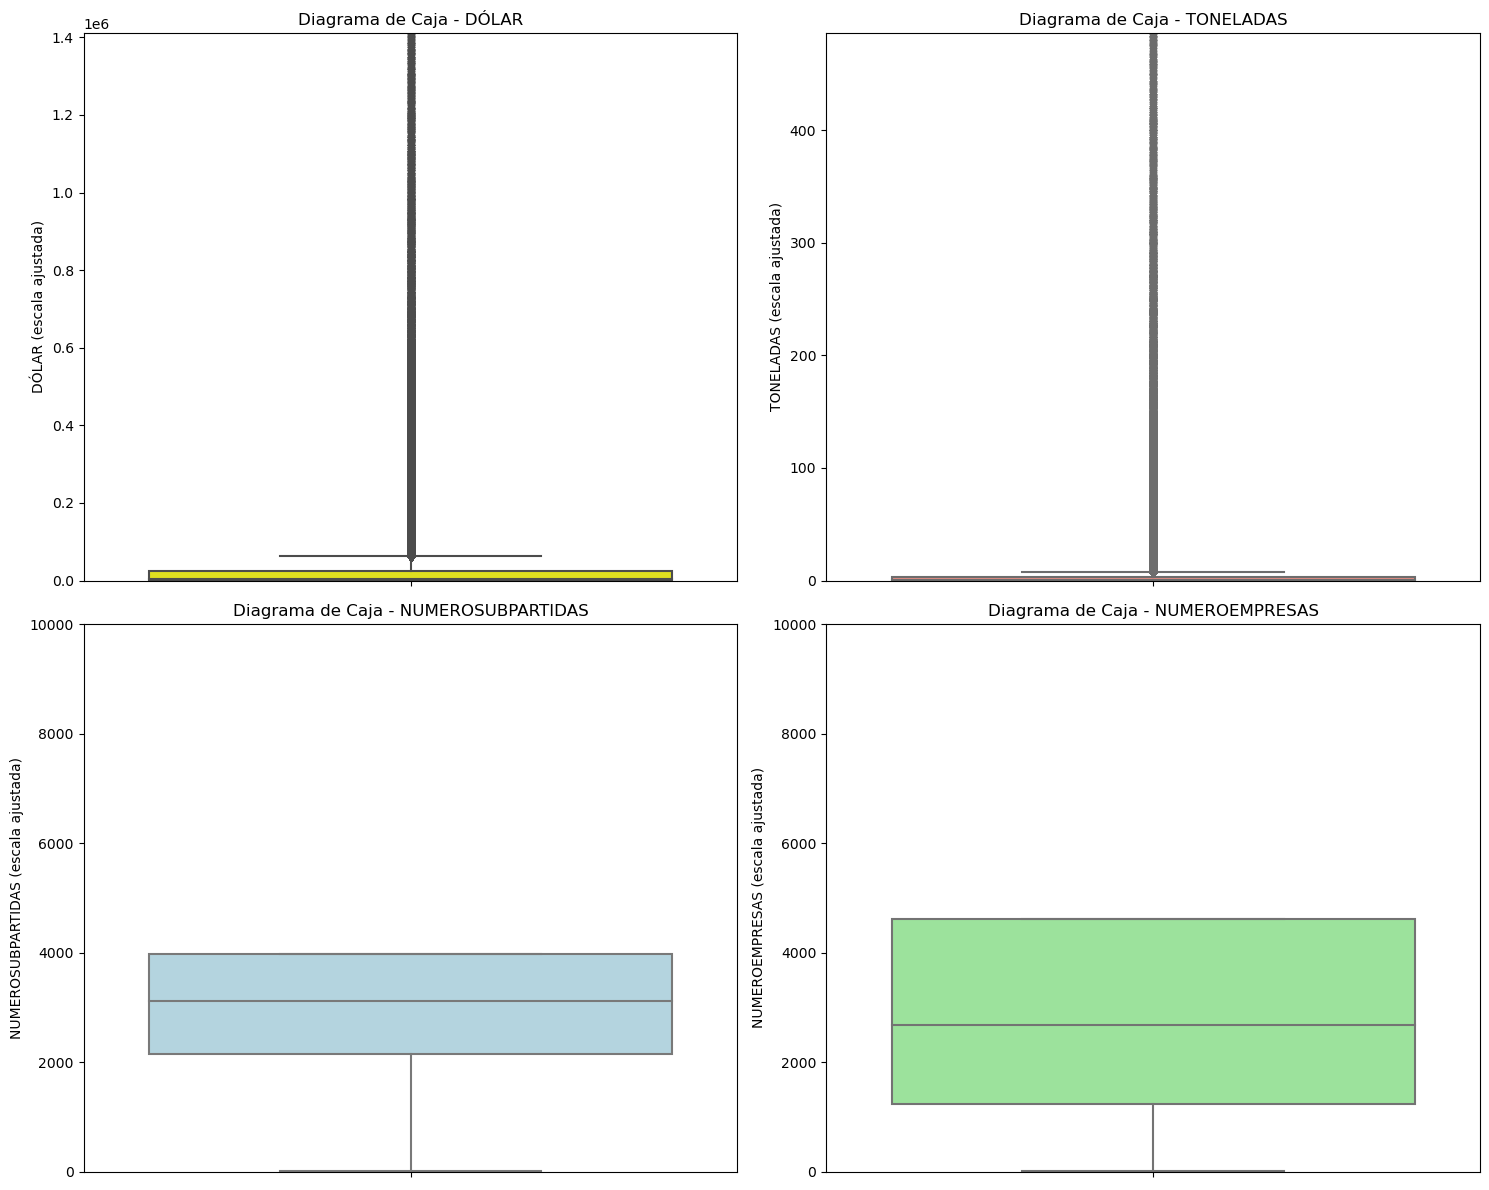

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 12))

# Diagrama de caja para DÓLAR
plt.subplot(2, 2, 1)
sns.boxplot(y=df_combinado2['DÓLAR'], color='yellow')
plt.title('Diagrama de Caja - DÓLAR')
plt.ylim(0, df_combinado2['DÓLAR'].quantile(0.98))  # Ajustar el límite superior para mejorar la visualización
plt.ylabel('DÓLAR (escala ajustada)')

# Diagrama de caja para NETOS
plt.subplot(2, 2, 2)
sns.boxplot(y=df_combinado2['TONELADAS'], color='salmon')
plt.title('Diagrama de Caja - TONELADAS')
plt.ylim(0, df_combinado2['TONELADAS'].quantile(0.98))  # Ajustar el límite superior
plt.ylabel('TONELADAS (escala ajustada)')

# Diagrama de caja para NUMEROSUBPARTIDAS
plt.subplot(2, 2, 3)
sns.boxplot(y=df_combinado2['NUMEROSUBPARTIDAS'], color='lightblue')
plt.title('Diagrama de Caja - NUMEROSUBPARTIDAS')
plt.ylim(0, 10000)  # Ampliar el rango para alejar la vista aún más
plt.ylabel('NUMEROSUBPARTIDAS (escala ajustada)')

# Diagrama de caja para NUMEROEMPRESAS
plt.subplot(2, 2, 4)
sns.boxplot(y=df_combinado2['NUMEROEMPRESAS'], color='lightgreen')
plt.title('Diagrama de Caja - NUMEROEMPRESAS')
plt.ylim(0, 10000)  # Ampliar el rango para alejar la vista aún más
plt.ylabel('NUMEROEMPRESAS (escala ajustada)')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()




In [20]:
import numpy as np

# Función para identificar outliers
def identificar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < umbral_inferior) | (df[columna] > umbral_superior)]
    return outliers

# Identificar outliers en las variables 'DÓLAR' y 'NETOS'
outliers_dolar = identificar_outliers(df_combinado2, 'DÓLAR')
outliers_toneladas = identificar_outliers(df_combinado2, 'TONELADAS')

# Mostrar la cantidad de outliers encontrados en cada variable
print(f"Outliers en DÓLAR: {len(outliers_dolar)}")
print(f"Outliers en NETOS: {len(outliers_toneladas)}")


Outliers en DÓLAR: 23505
Outliers en NETOS: 27151


In [21]:
# Asegúrate de que df_combinado2 esté correctamente definido
# Total de datos
total_datos = len(df_combinado2)

# Porcentaje de outliers en DÓLAR
porcentaje_outliers_dolar = (len(outliers_dolar) / total_datos) * 100

# Porcentaje de outliers en NETOS
porcentaje_outliers_netos = (len(outliers_toneladas) / total_datos) * 100

# Mostrar resultados
print(f"Porcentaje de outliers en DÓLAR: {porcentaje_outliers_dolar:.2f}%")
print(f"Porcentaje de outliers en TONELADAS: {porcentaje_outliers_netos:.2f}%")

Porcentaje de outliers en DÓLAR: 15.93%
Porcentaje de outliers en TONELADAS: 18.40%


Variables categóricas

**Frecuencia de DEPARTAMENTO ORIGEN:** Las exportaciones se concentran en los principales departamentos del país,  con Bogotá D.C. siendo el líder absoluto, mientras que otros departamentos tienen una participación mucho menor.

**Frecuencia de TRANSPORTE:** El transporte marítimo y aéreo son los medios predominantes para las exportaciones, con una ligera preferencia por el transporte marítimo.Esto podría indicar que las exportaciones son principalmente a destinos lejanos o que involucran grandes volúmenes, lo que hace más rentable el uso de transporte marítimo y aéreo.

**Distribución de PUERTO:** Los departamentos que no tienen acceso directo a un puerto marítimo o cuyas exportaciones no requieren transporte marítimo explican la distribución observada. Hay una ligera mayoría de exportaciones que no están asociadas a que su departamento tenga puerto marítimo (52,7%), mientras que el 46,8% de las exportaciones sí lo hacen.

**Distribución de CLASE DEL PRODUCTO:** La categoría dominante es "Sin minería, petróleo y sus derivados", representando el 99,6% de las exportaciones. Aunque la categoría "Petróleo y sus derivados y minas" representa una fracción muy pequeña en términos de volumen exportado, su contribución es significativa en términos de valor en dólares (55%) y en netos (92%).


In [22]:
import pandas as pd

# Asumiendo que df es tu DataFrame

# Calcular la moda de cada variable categórica
moda_departamento = df_combinado2['DEPARTAMENTO ORIGEN'].mode()[0]
moda_transporte = df_combinado2['TRANSPORTE'].mode()[0]
moda_puerto = df_combinado2['PUERTO'].mode()[0]
moda_clase_producto = df_combinado2['Clas.'].mode()[0]

# Imprimir las modas
print(f"Moda de DEPARTAMENTO ORIGEN: {moda_departamento}")
print(f"Moda de TRANSPORTE: {moda_transporte}")
print(f"Moda de PUERTO: {moda_puerto}")
print(f"Moda de CLASE DEL PRODUCTO: {moda_clase_producto}")

Moda de DEPARTAMENTO ORIGEN: BOGOTA D.C.
Moda de TRANSPORTE: Marítimo
Moda de PUERTO: NO
Moda de CLASE DEL PRODUCTO: Sin minería. petróleo y sus derivados


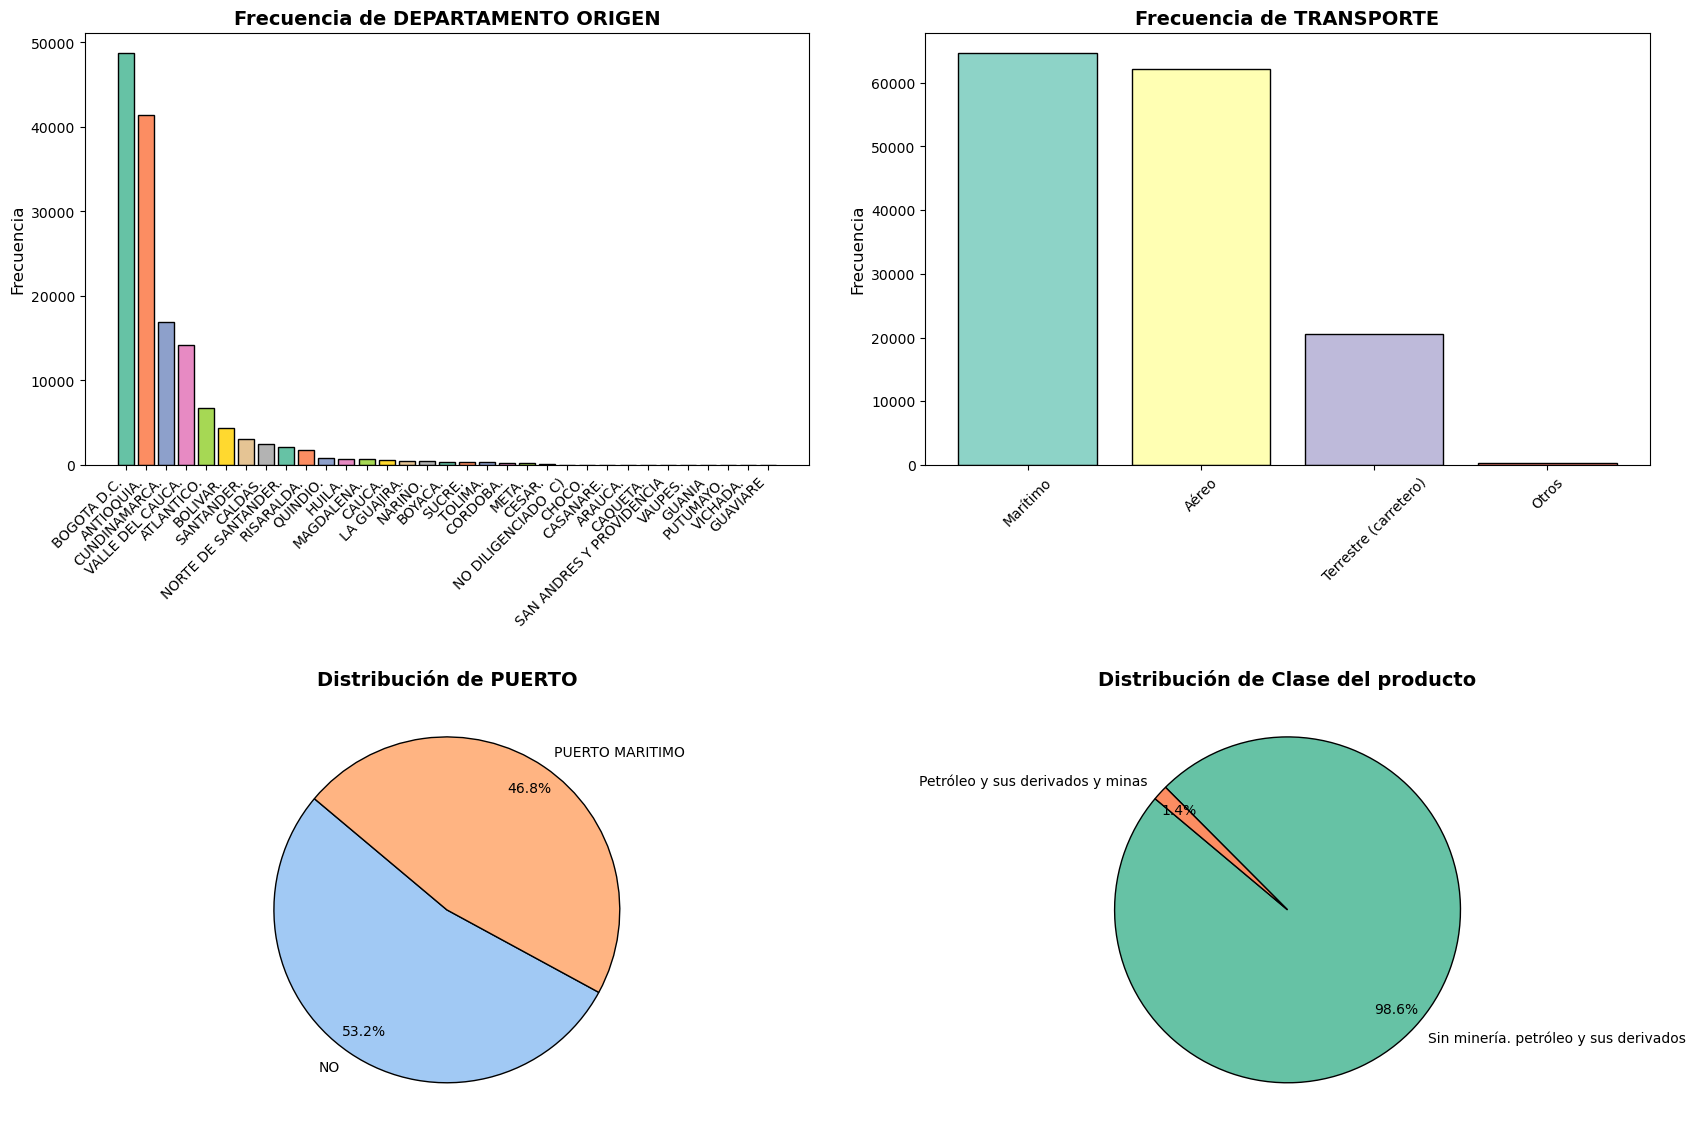

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar una paleta de colores para que cada barra tenga un color diferente
colors_departamento = sns.color_palette('Set2', n_colors=len(df_combinado2['DEPARTAMENTO ORIGEN'].unique()))
colors_transporte = sns.color_palette('Set3', n_colors=len(df_combinado2['TRANSPORTE'].unique()))

# Configurar el tamaño del gráfico
plt.figure(figsize=(18, 12))

# Gráfico de barras para DEPARTAMENTO ORIGEN
plt.subplot(2, 2, 1)
departamento_order = df_combinado2['DEPARTAMENTO ORIGEN'].value_counts().sort_values(ascending=False)
plt.bar(departamento_order.index, departamento_order.values, color=colors_departamento, edgecolor='black')
plt.title('Frecuencia de DEPARTAMENTO ORIGEN', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Gráfico de barras para TRANSPORTE
plt.subplot(2, 2, 2)
transporte_order = df_combinado2['TRANSPORTE'].value_counts().sort_values(ascending=False)
plt.bar(transporte_order.index, transporte_order.values, color=colors_transporte, edgecolor='black')
plt.title('Frecuencia de TRANSPORTE', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='center', fontsize=10)  # Etiquetas horizontales

# Gráfico de torta para PUERTO
plt.subplot(2, 2, 3)
puerto_order = df_combinado2['PUERTO'].value_counts().sort_values(ascending=False)
puerto_order.plot.pie(autopct='%1.1f%%', 
                      colors=sns.color_palette('pastel'), 
                      startangle=140, 
                      wedgeprops=dict(edgecolor='black'),
                      pctdistance=0.85)  # Alejar las etiquetas del centro
plt.title('Distribución de PUERTO', fontsize=14, fontweight='bold')
plt.ylabel('')  # Ocultar la etiqueta del eje y

# Gráfico de torta para Clas. con una nueva paleta de colores
plt.subplot(2, 2, 4)
clas_order = df_combinado2['Clas.'].value_counts().sort_values(ascending=False)
# Cambia los colores aquí para "Clas."
clas_order.plot.pie(autopct='%1.1f%%', 
                    colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'],  # Nueva combinación de colores
                    startangle=140, 
                    wedgeprops=dict(edgecolor='black'),
                    pctdistance=0.85)  # Alejar las etiquetas del centro
plt.title('Distribución de Clase del producto', fontsize=14, fontweight='bold')
plt.ylabel('')  # Ocultar la etiqueta del eje y

# Mejorar el layout para que los gráficos no se sobrepongan
plt.tight_layout(pad=3.0)
plt.show()





### **<span> Análisis de conjuntos de variables </span>** 

Análisis de algunas variables objetivo


El transporte marítimo es el medio más importante tanto en términos de valor económico como en volumen transportado, lo que subraya la importancia de la infraestructura portuaria para el comercio exterior. Sin embargo, la presencia o ausencia de puertos afecta la distribución y elección de otros modos de transporte, como el aéreo, principalmente. 



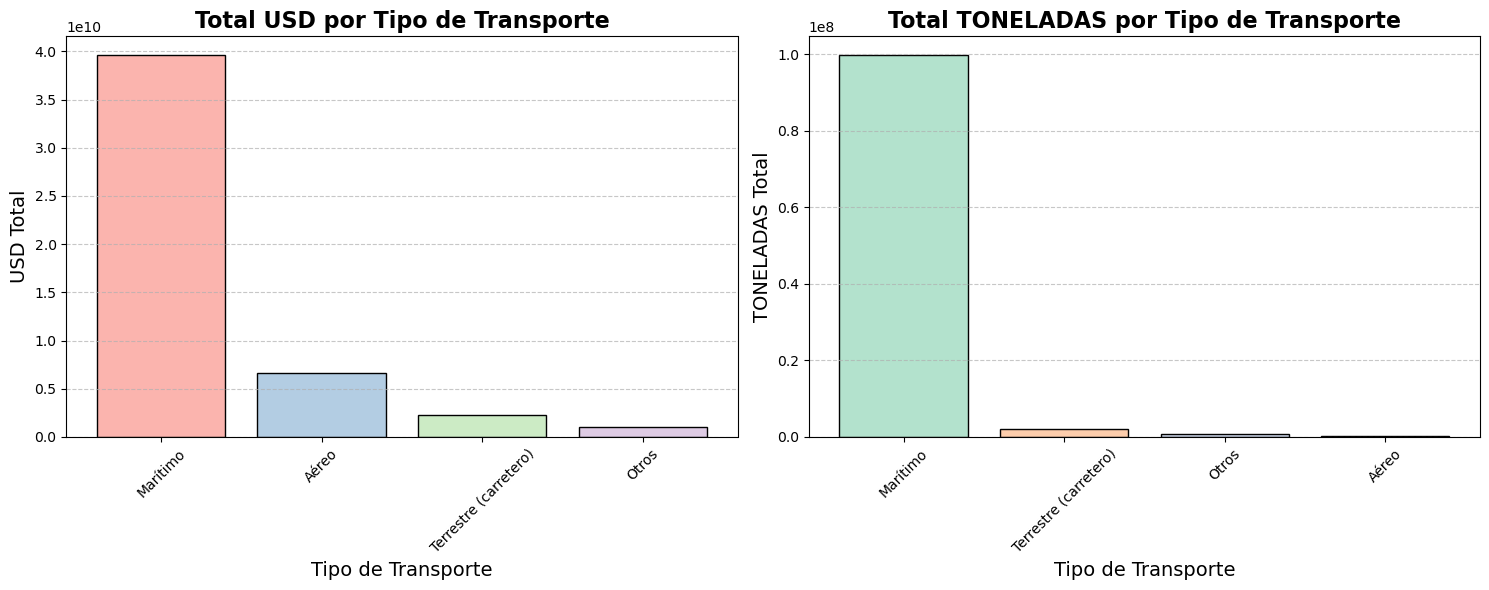

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la suma de DÓLAR y TONELADAS por cada categoría de TRANSPORTE
suma_dolar_por_transporte = df_combinado2.groupby('TRANSPORTE')['DÓLAR'].sum().sort_values(ascending=False)
suma_toneladas_por_transporte = df_combinado2.groupby('TRANSPORTE')['TONELADAS'].sum().sort_values(ascending=False)

# Crear una lista de colores diferentes para las barras
colors_dolar = sns.color_palette("Pastel1", len(suma_dolar_por_transporte))
colors_toneladas = sns.color_palette("Pastel2", len(suma_toneladas_por_transporte))

# Crear un lienzo con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primer subplot para DÓLAR
axs[0].bar(suma_dolar_por_transporte.index, suma_dolar_por_transporte, color=colors_dolar, edgecolor='black')
axs[0].set_title('Total USD por Tipo de Transporte', fontsize=16, weight='bold')
axs[0].set_xlabel('Tipo de Transporte', fontsize=14)
axs[0].set_ylabel('USD Total', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)  # Etiquetas en ángulo de 45 grados
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo subplot para TONELADAS
axs[1].bar(suma_toneladas_por_transporte.index, suma_toneladas_por_transporte, color=colors_toneladas, edgecolor='black')
axs[1].set_title('Total TONELADAS por Tipo de Transporte', fontsize=16, weight='bold')
axs[1].set_xlabel('Tipo de Transporte', fontsize=14)
axs[1].set_ylabel('TONELADAS Total', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)  # Etiquetas en ángulo de 45 grados
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


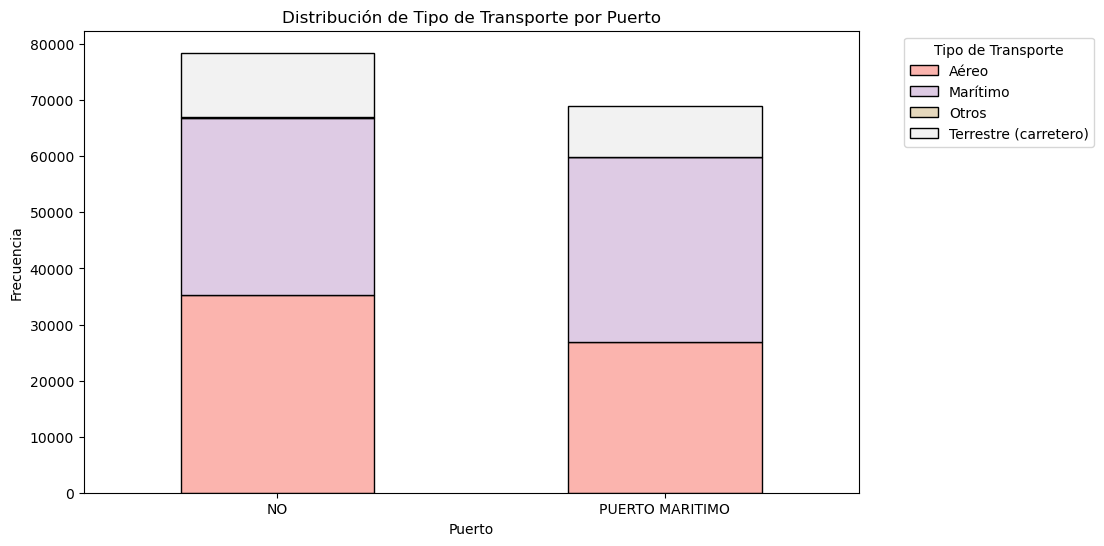

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que df es tu DataFrame

# Crear una tabla de contingencia (crosstab) entre PUERTO y TRANSPORTE
contingencia = pd.crosstab(df_combinado2['PUERTO'], df_combinado2['TRANSPORTE'])

# Crear un gráfico de barras apiladas usando la paleta 'Pastel1'
contingencia.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1', edgecolor='black')
plt.title('Distribución de Tipo de Transporte por Puerto')
plt.xlabel('Puerto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Esto asegura que las etiquetas en el eje X estén horizontales
plt.legend(title='Tipo de Transporte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



-*Defino las variables PUERTO donde 1= NO: NO TIENE PUERTO y 0= TIENE PUERTO*

-*TRANSPORTE = 1: AÉREO y 0= CATEGORÍAS RESTANTES*

In [26]:
df_combinado2['NOTIENE-PUERTO'] = df_combinado2.apply(lambda row: 1 if row['PUERTO']== 'NO' else 0, axis=1)
df_combinado2['TRANSPORTEAEREO'] = df_combinado2.apply(lambda row: 1 if row['TRANSPORTE']== 'Aéreo' else 0, axis=1)
df_combinado2['CLAS'] = df_combinado2.apply(lambda row: 1 if row['Clas.']== 'Sin minería. petróleo y sus derivados' else 0, axis=1)
 

Filtro solo aéreo, para revisar las relaciones de las variables con las TONELADAS movilizadas de forma AÉREA

 -No hay multicolinealidad significativa entre NOTIENE-PUERTO, TRANSPORTEAEREO, CLAS debido a que su VIF es cerca de 1

 -Hay un VIF moderado entre DÓLAR y TONELADAS
 
En general, no parece haber un problema significativo de multicolinealidad en este modelo. Las variables "TONELADAS" y "DÓLAR" muestran una moderada colinealidad, pero están dentro de un rango aceptable.
 

In [27]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Filtrar los datos donde TRANSPORTE = 'Aéreo'
df_aereo = df_combinado2[df_combinado2['TRANSPORTEAEREO']==1]
                       
# Seleccionar las variables de interés
X = df_combinado2[['NOTIENE-PUERTO', 'TRANSPORTEAEREO', 'TONELADAS','DÓLAR','CLAS']]

# Añadir una constante al modelo (intercepto)
X = add_constant(X)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print(vif_data)

           feature        VIF
0            const  73.268411
1   NOTIENE-PUERTO   1.003752
2  TRANSPORTEAEREO   1.008449
3        TONELADAS   3.660123
4            DÓLAR   3.635833
5             CLAS   1.027484


La distribución de los puntos sugiere lo siguiente:

Los departamentos que tienen puerto (0), tienden a tener menos toneladas aéreas exportadas en comparación con los departamentos que no tienen puerto (1).
Los departamentos sin puerto (1) muestran una mayor dispersión y una cantidad significativamente mayor de toneladas aéreas exportadas.
Esto podría reflejar que los departamentos sin acceso a un puerto marítimo dependen más del transporte aéreo para sus exportaciones, mientras que los que tienen un puerto posiblemente usan más transporte marítimo, exportando menos por vía aérea. En resumen, los departamentos sin puerto exportan significativamente más toneladas vía aérea en comparación con los departamentos con puerto. Esto refuerza la idea de que los departamentos sin acceso a un puerto marítimo dependen más del transporte aéreo para sus exportaciones.

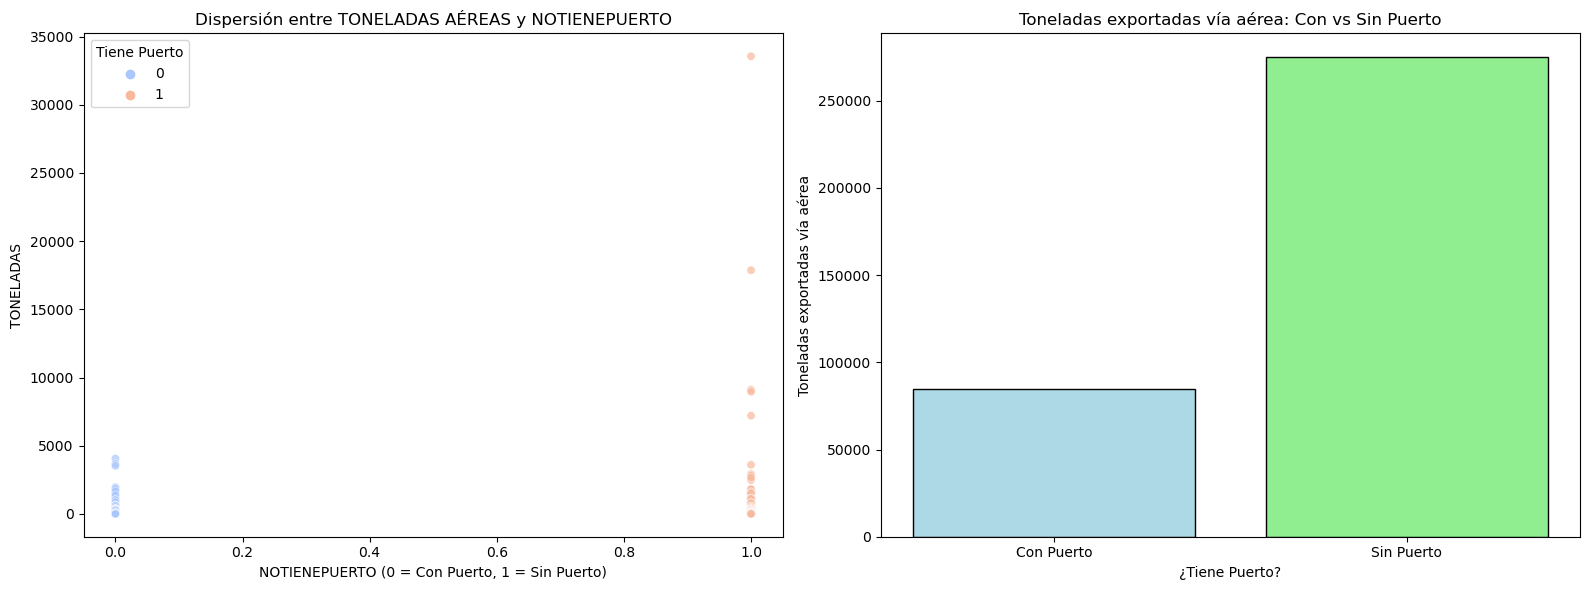

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración del gráfico conjunto con subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primer gráfico: Dispersión entre TONELADAS AÉREAS y NOTIENEPUERTO
sns.scatterplot(ax=axes[0], x='NOTIENE-PUERTO', y='TONELADAS', data=df_aereo, hue='NOTIENE-PUERTO', palette='coolwarm', alpha=0.7)
axes[0].set_title('Dispersión entre TONELADAS AÉREAS y NOTIENEPUERTO')
axes[0].set_xlabel('NOTIENEPUERTO (0 = Con Puerto, 1 = Sin Puerto)')
axes[0].set_ylabel('TONELADAS')
axes[0].legend(title='Tiene Puerto')

# Segundo gráfico: Barras que muestran la suma de toneladas exportadas vía aérea
suma_toneladas_aereo = df_aereo.groupby('NOTIENE-PUERTO')['TONELADAS'].sum().reset_index()
axes[1].bar(suma_toneladas_aereo['NOTIENE-PUERTO'], suma_toneladas_aereo['TONELADAS'], color=['lightblue', 'lightgreen'], edgecolor='black')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Con Puerto', 'Sin Puerto'])
axes[1].set_xlabel('¿Tiene Puerto?')
axes[1].set_ylabel('Toneladas exportadas vía aérea')
axes[1].set_title('Toneladas exportadas vía aérea: Con vs Sin Puerto')

# Ajustar el layout para que no se sobrepongan los elementos
plt.tight_layout()

# Mostrar el gráfico
plt.show()



**Correlación**


El análisis del gráfico de correlación revela varias relaciones clave entre las variables asociadas a las exportaciones aéreas en los departamentos colombianos, considerando la presencia de un puerto. Se destaca una correlación negativa entre la falta de un puerto y el valor de las exportaciones en dólares, lo que sugiere que los departamentos sin puerto tienden a exportar menos en valor por vía aérea. Además, existe una alta correlación entre el número de empresas exportadoras y la diversidad de productos exportados, lo que indica que más empresas suelen estar asociadas con una mayor variedad de subpartidas exportadas. Sin embargo, el número de empresas no está fuertemente correlacionado con el valor de las exportaciones en dólares, sugiriendo que muchas de estas empresas pueden estar exportando productos de bajo valor. Estos hallazgos subrayan las limitaciones logísticas que enfrentan los departamentos sin puerto y la importancia de la diversificación en la actividad exportadora.

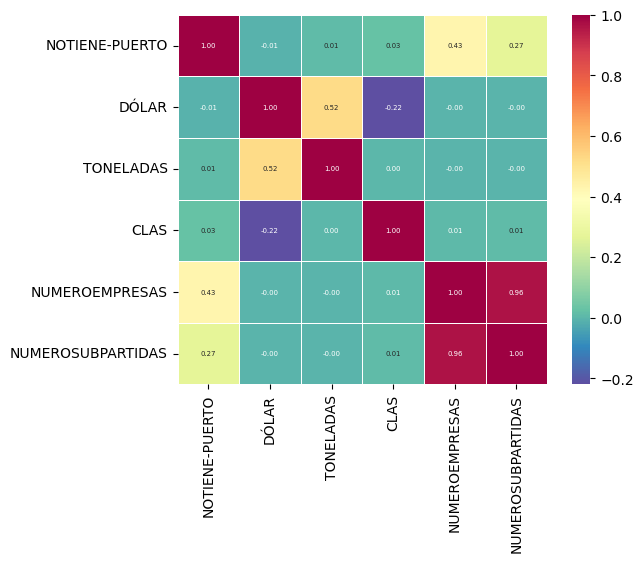

In [29]:
# Seleccionar las columnas de interés
cols = ['NOTIENE-PUERTO', 'DÓLAR', 'TONELADAS','CLAS','NUMEROEMPRESAS','NUMEROSUBPARTIDAS']  # Ajusta esta lista a las columnas que desees
cormat = df_aereo[cols].corr()

# Generar el mapa de calor con las columnas seleccionadas
hm = sns.heatmap(cormat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 5},
                 linewidth=.5,
                 cmap="Spectral_r")
plt.show()


### **<span> Regresión </span>** 


### **<span> DF CARGA AÉREA </span>** 

Los departamentos que no tienen puerto muestran una tendencia a exportar más en toneladas por vía aérea, lo cual podría interpretarse como un mayor uso de este medio de transporte en ausencia de puertos marítimos.El valor en dólares de las exportaciones y la clas sin minería, petróleo y sus derivados son variables que tienen un impacto positivo y significativo en el volumen exportado.El número de empresas parece estar relacionado negativamente con el volumen exportado, lo que podría reflejar una fragmentación en las exportaciones, donde muchas empresas exportan pequeñas cantidades, uno de los casos que pueden pasar, dado un objetivo de exportación. El modelo tiene un poder explicativo limitado (28%) sugiriendo que otras variables no consideradas en el ejercicio pueden influir en el volumen de exportaciones por vía aérea.

In [30]:
import statsmodels.api as sm

# Agregar una constante (intercepto) al modelo
X = sm.add_constant(df_aereo[['NOTIENE-PUERTO','DÓLAR','CLAS','NUMEROEMPRESAS','NUMEROSUBPARTIDAS']])

# Modelo para NETOS
model_toneladas = sm.OLS(df_aereo['TONELADAS'], X).fit()
print("Modelo de regresión para TONELADAS")
print(model_toneladas.summary())



Modelo de regresión para TONELADAS
                            OLS Regression Results                            
Dep. Variable:              TONELADAS   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     5032.
Date:                Fri, 06 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:23:03   Log-Likelihood:            -3.9771e+05
No. Observations:               62136   AIC:                         7.954e+05
Df Residuals:                   62130   BIC:                         7.955e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
con